## Data analysis for cybersecurity Final Team Project
### Team members: Leon Lin, Jung Hoon Seo

## Setup: Import Libraries and Data

Dataset Download: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In this project, we are using Credit Card Fraud detection Dataset from Kaggle. The dataset contains 30 features with a class (0 = Regular Transaction, 1 = Fraud).



In [ ]:
# !pip install imbalanced-learn
import os
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
current_path = os.getcwd()
csv_file_path = current_path + "/Desktop/creditcard.csv"

In [ ]:
creditcard = pd.read_csv(csv_file_path)

In [ ]:
creditcard.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Explore Dataset

### Scatterplot

In this section, we are going to explore the distribution of transactions in the transaction time and amount space by creating a scatterplot. Time and transaction amount are the only two labeled attributes that are present in our dataset.

In [ ]:
def create_scatter_plot(Fraud, Regular, title):
    sns.scatterplot(Regular['Time'], Regular['Amount'], label = 'Regular Transaction (0)')
    sns.scatterplot(Fraud['Time'], Fraud['Amount'], label = 'Fraud (1)')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Amount')
    plt.title(title)
    plt.show()

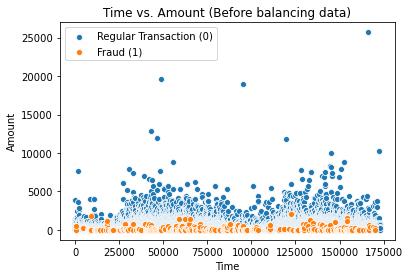

In [ ]:
title = "Time vs. Amount (Before balancing data)"
Regular = creditcard[creditcard['Class']== 0]
Fraud = creditcard[creditcard['Class']== 1]

create_scatter_plot(Fraud, Regular, title)


In the scatterplot, we can clearly see that regular transactions greatly outnumber fraudulent transactions. We can also observe that the fraudulent transactions also lie in the same space as the regular transactions.


### Box Plot

We also created a box plot to illustrate the significant imbalance between regular transactions and fraudulent transactions.

In [ ]:
def create_boxplot(Fraud, Regular, title):
    fig = plt.figure(figsize = (6, 5))
    Not_fraud = len(Regular)
    Fraud = len(Fraud)
    plt.bar(['Regular Transaction' , 'Fraud'], [Not_fraud, Fraud],
            width = 0.3, color = 'maroon')
    plt.xlabel("Transaction")
    plt.ylabel("Fraud")
    plt.title(title)
    plt.show()

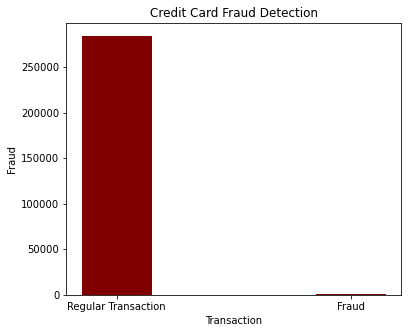

In [ ]:
title = "Credit Card Fraud Detection"
create_boxplot(Fraud, Regular,title)

In [ ]:
print("The number of Regular Transaction data : ", len(Regular))
print("The number of Fraud data               : ", len(Fraud))

The number of Regular Transaction data :  284315
The number of Fraud data               :  492


## Applying different models (before Data Preprocessing)
In this section, we train three different models: Random Forest Classifier, Logistic Regression, and Gaussian Naive Bayes to see there performance using the original dataset before doing any data preprocessing.

### Splitting data into train and test sets

In [ ]:
X = creditcard.drop('Class', axis=1)
Y = creditcard.Class
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75)

In [ ]:
print("Training size : ", len(X_train))
print("Testing size  : ", len(X_test))

Training size :  213605
Testing size  :  71202


### Random Forest Classifier

In [ ]:
RFC_classifier_None = RandomForestClassifier(criterion= 'gini', max_depth=10, min_samples_split=5)
RFC_classifier_None.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [ ]:
y_pred = RFC_classifier_None.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy score: " , accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71094
           1       0.94      0.69      0.80       108

    accuracy                           1.00     71202
   macro avg       0.97      0.85      0.90     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy score:  0.9994663071262043


### Logistic Regression

In [ ]:
Logis_None = LogisticRegression(solver='liblinear')
Logis_None.fit(X_train, y_train)
Logis_y_pred = Logis_None.predict(X_test)

In [ ]:
print(classification_report(y_test, Logis_y_pred))
print("Accuracy score: " , accuracy_score(y_test, Logis_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71094
           1       0.81      0.59      0.68       108

    accuracy                           1.00     71202
   macro avg       0.90      0.80      0.84     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy score:  0.9991713715906857


### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb_y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, gnb_y_pred))
print("Accuracy score: " , accuracy_score(y_test, gnb_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71094
           1       0.14      0.61      0.23       108

    accuracy                           0.99     71202
   macro avg       0.57      0.80      0.61     71202
weighted avg       1.00      0.99      1.00     71202

Accuracy score:  0.9938203983034184


As we can see from the classification report even if three models produced very high accuracy scores, the precision and recall are not as high as their accuracy scores.

## Data Preprocessing
In this section, we are trying to preprocess data by using two different methods, oversampling and undersampling.

### Oversampling

In [ ]:
def over_sampling_dataset(n_samples, creditcard):
    not_Fraud = creditcard[creditcard['Class']==0]
    Fraud = creditcard[creditcard['Class']==1]
    X_Fraud = Fraud.drop('Class', axis=1)
    Y_Fraud = Fraud.Class
    X_Fraud_train, X_Fraud_test, y_Fraud_train, y_Fraud_test = train_test_split(X_Fraud, Y_Fraud, train_size=0.75)

    X_not_Fraud = not_Fraud.drop('Class', axis=1)
    Y_not_Fraud = not_Fraud.Class
    X_not_Fraud_train, X_not_Fraud_test, y_not_Fraud_train, y_not_Fraud_test = train_test_split(X_not_Fraud, Y_not_Fraud, train_size=0.75)

    Fraud_upsampled = resample(X_Fraud_train,
                                 replace=True,    # sample with replacement
                                 n_samples= n_samples, # to match majority class
                                 random_state=42)  # reproducible results
    temp_y = np.zeros(n_samples)
    temp_y += 1
    temp_y = temp_y.astype(int)
    Fraud_upsampled.insert(30, 'Class', temp_y, True)
    New_X_Fraud = Fraud_upsampled.drop('Class', axis=1)
    New_Y_Fraud = Fraud_upsampled.Class

    resampled_X_train = pd.concat([X_not_Fraud_train,New_X_Fraud])
    resampled_Y_train = pd.concat([y_not_Fraud_train,New_Y_Fraud])
    resampled_X_test = pd.concat([X_Fraud_test,X_not_Fraud_test])
    resampled_Y_test = pd.concat([y_Fraud_test,y_not_Fraud_test])
    return New_X_Fraud, X_not_Fraud_train, resampled_X_train, resampled_Y_train, resampled_X_test, resampled_Y_test


In [ ]:
New_X_Fraud, X_not_Fraud_train, resampled_X_train, resampled_Y_train, resampled_X_test, resampled_Y_test = over_sampling_dataset(213236, creditcard)


### Boxplot after oversampling

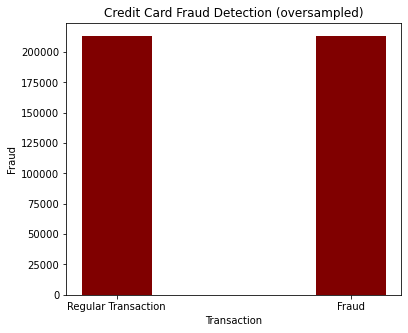

In [ ]:
title = "Credit Card Fraud Detection (oversampled)"
create_boxplot(resampled_Y_train[resampled_Y_train == 1],resampled_Y_train[resampled_Y_train == 0], title)

In [ ]:
print("Total count for non-Fraud :",len(resampled_Y_train[resampled_Y_train == 0]))
print("Total count for Fraud     :",len(resampled_Y_train[resampled_Y_train == 1]))

Total count for non-Fraud : 213236
Total count for Fraud     : 213236


## Scatter plot after oversampling

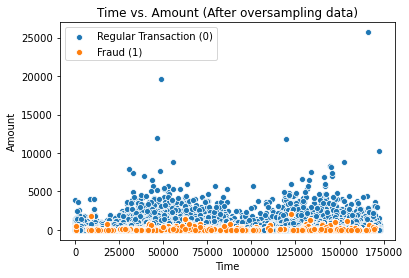

In [ ]:
title = "Time vs. Amount (After oversampling data)"
create_scatter_plot(New_X_Fraud, X_not_Fraud_train, title)

## Applying different models (After Oversampling)

### Random Forest Classifier

In [ ]:
RFC_classifier_Oversampled = RandomForestClassifier(criterion= 'gini', max_depth=10, min_samples_split=5)
RFC_classifier_Oversampled.fit(resampled_X_train, resampled_Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [ ]:
y_pred = RFC_classifier_Oversampled.predict(resampled_X_test)
print(classification_report(resampled_Y_test, y_pred))
print("Accuracy score: " , accuracy_score(resampled_Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.74      0.85      0.80       123

    accuracy                           1.00     71202
   macro avg       0.87      0.93      0.90     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy score:  0.9992415943372377


### Logistic Regression

In [ ]:
Logis_None = LogisticRegression(solver='liblinear')
Logis_None.fit(resampled_X_train, resampled_Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
Logis_y_pred = Logis_None.predict(resampled_X_test)
print(classification_report(resampled_Y_test, Logis_y_pred))
print("Accuracy score: " , accuracy_score(resampled_Y_test, Logis_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.93      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.95      0.54     71202
weighted avg       1.00      0.97      0.98     71202

Accuracy score:  0.9680205612201904


### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb_y_pred = gnb.fit(resampled_X_train, resampled_Y_train).predict(resampled_X_test)
print(classification_report(resampled_Y_test, gnb_y_pred))
print("Accuracy score: " , accuracy_score(resampled_Y_test, gnb_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.12      0.78      0.21       123

    accuracy                           0.99     71202
   macro avg       0.56      0.89      0.60     71202
weighted avg       1.00      0.99      0.99     71202

Accuracy score:  0.9899862363416758


Over-sampling did not really help models predict accurate values, and the performance was even worse. Our assumption is that over-sampling confused our models since many fraud data overlapped with the regular transactions. In addition, oversampling tends to cause overfitting.

### Undersampling

In [ ]:
def under_sampling_data(creditcard, rate):
    X = creditcard.drop('Class', axis=1)
    y = creditcard.Class
    rus = RandomUnderSampler(sampling_strategy=rate)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res
x_undersampled, y_undersampled = under_sampling_data(creditcard, 0.8)

In [ ]:
print("Class values after undersampled")
print(pd.value_counts(y_undersampled))

Class values after undersampled
0    615
1    492
Name: Class, dtype: int64


In [ ]:
x_undersampled['Class'] = y_undersampled

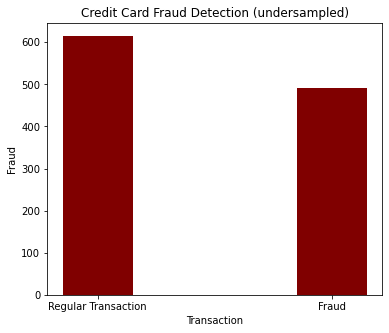

In [ ]:
title = "Credit Card Fraud Detection (undersampled)"
create_boxplot(y_undersampled[y_undersampled==1], y_undersampled[y_undersampled==0], title)

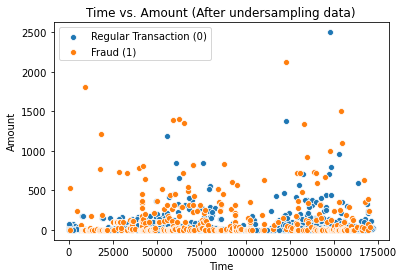

In [ ]:
title = "Time vs. Amount (After undersampling data)"
create_scatter_plot(x_undersampled[x_undersampled['Class']== 1],x_undersampled[x_undersampled['Class']== 0], title)

### Applying different models (After Undersampling)

In [ ]:
x_undersampled = x_undersampled.drop('Class', axis =1)

In [ ]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(x_undersampled, y_undersampled, train_size=0.75)


### Random Forest Classifier

In [ ]:
RFC_classifier_Undersampled = RandomForestClassifier(criterion= 'gini', max_depth=10, min_samples_split=5)
RFC_classifier_Undersampled.fit(X_under_train, y_under_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [ ]:
y_pred = RFC_classifier_Undersampled.predict(X_under_test)
print(classification_report(y_under_test, y_pred))
print("Accuracy score: " , accuracy_score(y_under_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       157
           1       0.99      0.92      0.95       120

    accuracy                           0.96       277
   macro avg       0.97      0.96      0.96       277
weighted avg       0.96      0.96      0.96       277

Accuracy score:  0.9602888086642599


### Logistic Regression

In [ ]:
Logis_Undersampled = LogisticRegression(solver='liblinear')
Logis_Undersampled.fit(X_under_train, y_under_train)

LogisticRegression(solver='liblinear')

In [ ]:
Logis_y_pred = Logis_Undersampled.predict(X_under_test)
print(classification_report(y_under_test, Logis_y_pred))
print("Accuracy score: " , accuracy_score(y_under_test, Logis_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       157
           1       0.98      0.92      0.95       120

    accuracy                           0.96       277
   macro avg       0.96      0.95      0.96       277
weighted avg       0.96      0.96      0.96       277

Accuracy score:  0.9566787003610109


### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb_y_pred = gnb.fit(X_under_train, y_under_train).predict(X_under_test)
print(classification_report(y_under_test, gnb_y_pred))
print("Accuracy score: " , accuracy_score(y_under_test, gnb_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       157
           1       0.99      0.75      0.85       120

    accuracy                           0.89       277
   macro avg       0.91      0.87      0.88       277
weighted avg       0.90      0.89      0.89       277

Accuracy score:  0.8880866425992779


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_under_train, y_under_train)

clf_pred = clf.predict(X_under_test)
print(classification_report(y_under_test, clf_pred))
print("Accuracy score: " , accuracy_score(y_under_test, clf_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       157
           1       0.92      0.90      0.91       120

    accuracy                           0.92       277
   macro avg       0.92      0.92      0.92       277
weighted avg       0.92      0.92      0.92       277

Accuracy score:  0.924187725631769


Undersampling increased precision and recall. However, at the same time, the accuracy score dropped. However, its performance is far better than oversampling. Therefore, we plan to use undersampled dataset as input to our ensemble classifier in the next section.

## Ensemble Learning

In this section, we are trying to build a ensemble model that combines three models (Random Forest, Logistic Regression, Gaussian Naive Bayes) in the prediction stage and perform majority voting to classify transactions. Our ensemble classifier works as follows:

1. Train Random Forest, Logistic Regression, and Gaussian Naive Bayes classifiers on the training partition of the    undersampled dataset.
2. Test each classifier on the testing partition and save each of their predictions in the form of bit array.
3. Create a new bit array that reflects the majority votes of the 3 classifiers by comparing the bit arrays of the    3 classfiers. The new bit array is the prediction of our ensemble classifier.


In [ ]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(x_undersampled, y_undersampled, train_size=0.80)


In [ ]:
RFC_classifier_Undersampled = RandomForestClassifier(criterion= 'gini', max_depth=10, min_samples_split=5)
RFC_classifier_Undersampled.fit(X_under_train, y_under_train)
RFC_y_pred = RFC_classifier_Undersampled.predict(X_under_test)
print(classification_report(y_under_test, RFC_y_pred))
print("Accuracy score: " , accuracy_score(y_under_test, RFC_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       118
           1       0.98      0.89      0.93       104

    accuracy                           0.94       222
   macro avg       0.95      0.94      0.94       222
weighted avg       0.94      0.94      0.94       222

Accuracy score:  0.9414414414414415


In [ ]:
Logis_Undersampled = LogisticRegression(solver='liblinear')
Logis_Undersampled.fit(X_under_train, y_under_train)
Logis_y_pred = Logis_Undersampled.predict(X_under_test)
print(classification_report(y_under_test, Logis_y_pred))
print("Accuracy score: " , accuracy_score(y_under_test, Logis_y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       118
           1       1.00      0.86      0.92       104

    accuracy                           0.93       222
   macro avg       0.94      0.93      0.93       222
weighted avg       0.94      0.93      0.93       222

Accuracy score:  0.9324324324324325


In [ ]:
gnb = GaussianNB()
gnb_y_pred = gnb.fit(X_under_train, y_under_train).predict(X_under_test)

print(classification_report(y_under_test, gnb_y_pred))
print("Accuracy score: " , accuracy_score(y_under_test, gnb_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       118
           1       0.98      0.78      0.87       104

    accuracy                           0.89       222
   macro avg       0.91      0.88      0.88       222
weighted avg       0.90      0.89      0.89       222

Accuracy score:  0.8873873873873874


In [ ]:
Ensemble_result = RFC_y_pred + Logis_y_pred + gnb_y_pred
Ensemble_result[np.where(Ensemble_result >= 2)] = 1

In [ ]:
print(classification_report(y_under_test, Ensemble_result))
print("Accuracy score: " , accuracy_score(y_under_test, Ensemble_result))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       118
           1       0.97      0.90      0.94       104

    accuracy                           0.94       222
   macro avg       0.94      0.94      0.94       222
weighted avg       0.94      0.94      0.94       222

Accuracy score:  0.9414414414414415


The ensemble model did not produce the best precision and recall scores, however, it was helpful to overcome weakness of each model and still produced high stable scores in all categories (precision, recall, accuracy) compared to those single models.